In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.utils.class_weight import compute_class_weight

In [14]:
df = pd.read_csv('../data/wine_quality_modelos2.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media
6493,red,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media


In [15]:
registros_con_quality_9 = df[df['quality'] == 9]
registros_con_quality_9

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category
2373,red,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,alta
2419,white,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,alta
2426,white,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,alta
2475,white,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,alta
3204,white,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,alta


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wine_type             6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  quality_category      6497 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [17]:
mapeo_quality_category = {
    'baja': 0,
    'media': 1,
    'alta': 2
}
df['quality_category_int'] = df['quality_category'].map(mapeo_quality_category)

In [18]:
map_wine_type = {
    "red": 0,
    "white": 1
}

df["wine_type_int"] = df["wine_type"].map(map_wine_type)

In [19]:
df.to_csv('../data/wine_quality_modelos3.csv', index= False)
df

,wine_type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category,quality_category_int,wine_type_int
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja,0,0
1,white,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,baja,0,1
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,baja,0,0
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,media,1,0
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,baja,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,media,1,1
6493,red,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,baja,0,0
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,media,1,1
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,media,1,1


In [21]:
st_scaler = StandardScaler()

# Separamos las features de las etiquetas 
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar', 
        'chlorides', 'total sulfur dioxide', 'density', 'pH','sulphates','alcohol']]
y = df["quality_category_int"]
ytype = df['wine_type_int']

# Escalamos los datos
X_scaled = st_scaler.fit_transform(X)

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size = 0.3, random_state = 10, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10, stratify=y_temp)

print (X_train.shape)
print (X_test.shape)
print (X_valid.shape)
print (y_train.shape)
print (y_test.shape)
print (y_valid.shape)

(4547, 10)
(975, 10)
(975, 10)
(4547,)
(975,)
(975,)


In [46]:
capas = [
    keras.layers.Flatten(input_dim=10),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax')
]

model_neuronal = keras.models.Sequential(capas)

model_neuronal.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
model_neuronal.summary()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

history = model_neuronal.fit(
    X_train,
    y_train,
    class_weight=class_weights_dict,
    batch_size = 32,
    epochs = 125,
    validation_data = (X_valid, y_valid) # validation_split = 0.1
)

results = model_neuronal.evaluate(X_test, y_test)
results

c:\Users\amaci\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │         3,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,203 (16.42 KB)

 Trainable params: 4,203 (16.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4882 - loss: 1.0404 - val_accuracy: 0.3395 - val_loss: 1.0558
Epoch 2/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3879 - loss: 0.9007 - val_accuracy: 0.3938 - val_loss: 1.0262
Epoch 3/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4210 - loss: 0.8813 - val_accuracy: 0.4697 - val_loss: 0.9350
Epoch 4/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4785 - loss: 0.8340 - val_accuracy: 0.4913 - val_loss: 0.9325
Epoch 5/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4838 - loss: 0.8433 - val_accuracy: 0.5015 - val_loss: 0.9254
Epoch 6/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4961 - loss: 0.8191 - val_accuracy: 0.5190 - val_loss: 0.9023
Epoch 7/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5115 - loss: 0.8043 - val_accuracy: 0.5179 - val_loss: 0.9093
Epoch 8/125
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4978 - loss: 0.8198 - val_accu

[0.7709625959396362, 0.6307692527770996]

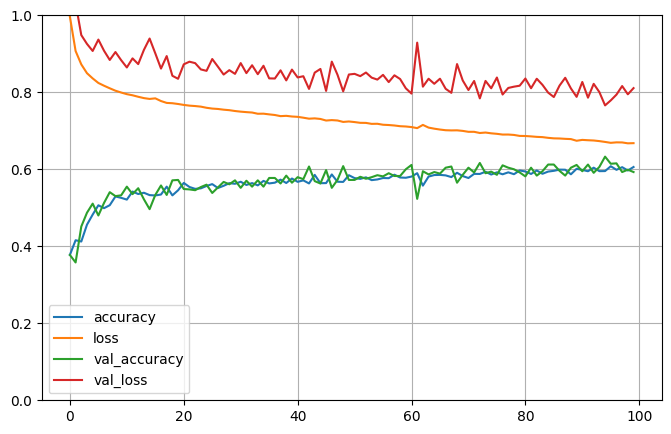

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [42]:
predictions = model_neuronal.predict(X_test)
predictions

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[8.85310769e-01, 1.14654444e-01, 3.48664544e-05],
       [8.25112939e-01, 1.74798697e-01, 8.82911700e-05],
       [9.38477337e-01, 6.14783280e-02, 4.43136196e-05],
       ...,
       [2.04709992e-01, 2.22792372e-01, 5.72497606e-01],
       [4.16708924e-02, 5.64372063e-01, 3.93957049e-01],
       [3.39063138e-01, 5.09969115e-01, 1.50967807e-01]], dtype=float32)

In [43]:
model_neuronal.predict(X_test).argmax(axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2,
       1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1,
       0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,

In [30]:
cm = confusion_matrix(y_test, model_neuronal.predict(X_test).argmax(axis=1))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


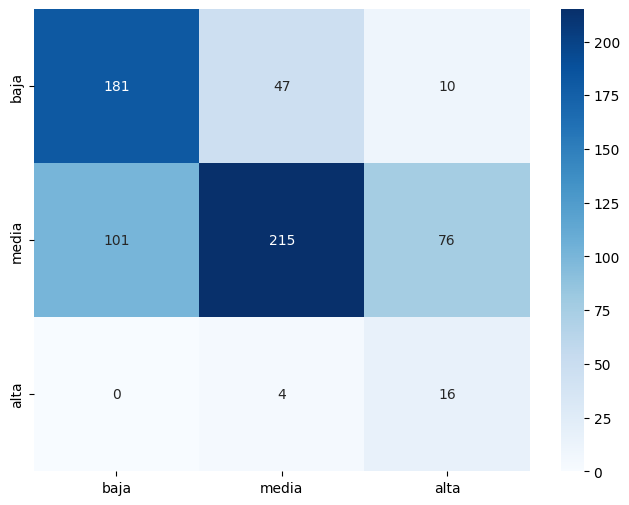

In [44]:
# Matriz de confusion
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(
    cm, 
    annot=True, 
    fmt='d',          # 'd' = formato entero (sin decimales)
    cmap='Blues',     # Colores azules (puedes usar 'Reds', 'Greens', etc.)
    cbar=True,        # Muestra la barra de colores lateral
    xticklabels=['baja', 'media', 'alta'],  # Nombres de clases (¡ajústalos!)
    yticklabels=['baja', 'media', 'alta'] # Nombres de clases
)

In [19]:
print(classification_report(y_test, model_neuronal.predict(X_test).argmax(axis=1)))

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.62      0.74      0.68       238
           1       0.77      0.44      0.56       392
           2       0.11      0.80      0.20        20

    accuracy                           0.56       650
   macro avg       0.50      0.66      0.48       650
weighted avg       0.70      0.56      0.59       650

